# Ray tracing

## Raytracing with simple shapes

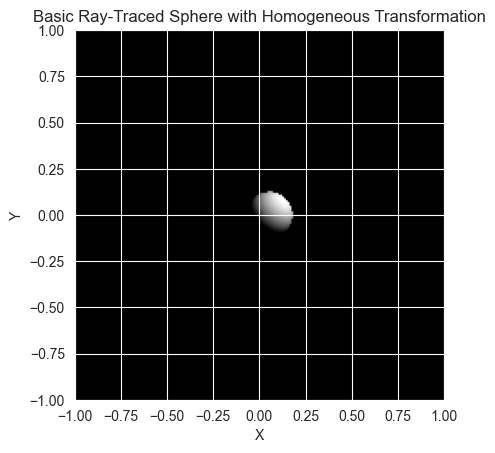

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ray-Sphere Intersection Function
def intersect_ray_sphere(ray_origin, ray_dir, sphere_center, sphere_radius):
    """Computes intersection of a ray with a sphere using quadratic formula"""
    oc = ray_origin - sphere_center
    a = np.dot(ray_dir, ray_dir)
    b = 2.0 * np.dot(oc, ray_dir)
    c = np.dot(oc, oc) - sphere_radius**2
    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return None  # No intersection
    t = (-b - np.sqrt(discriminant)) / (2.0 * a)  # Closest intersection
    return ray_origin + t * ray_dir if t > 0 else None

# Lambertian Shading Function
def compute_lighting(point, normal, light_pos):
    """Computes basic Lambertian shading"""
    light_dir = light_pos - point
    light_dir /= np.linalg.norm(light_dir)
    intensity = max(np.dot(normal, light_dir), 0)  # Dot product determines brightness
    return intensity

# Homogeneous Transformation Functions
def homogeneous_translation(tx, ty, tz):
    return np.array([[1, 0, 0, tx],
                     [0, 1, 0, ty],
                     [0, 0, 1, tz],
                     [0, 0, 0, 1]])

def homogeneous_scaling(sx, sy, sz):
    return np.array([[sx, 0, 0, 0],
                     [0, sy, 0, 0],
                     [0, 0, sz, 0],
                     [0, 0, 0, 1]])

# Image Resolution
width, height = 200, 200
aspect_ratio = width / height
fov = np.radians(90)  # Field of view
camera_origin = np.array([0, 0, -3])  # Camera positioned behind the scene

# Sphere Properties
sphere_center = np.array([0, 0, 1])  # Sphere position
sphere_radius = 0.5
light_position = np.array([2, 2, -1])  # Light source position

# Apply Homogeneous Transformation (Translate the Sphere)
sphere_center_homogeneous = np.append(sphere_center, 1)  # Convert to homogeneous
translation_matrix = homogeneous_translation(0.2, 0, 0)  # Move sphere slightly
transformed_sphere_center = np.dot(translation_matrix, sphere_center_homogeneous)[:3]  # Back to 3D

# Generate Image
image = np.zeros((height, width))

for y in range(height):
    for x in range(width):
        # Compute ray direction for each pixel
        pixel_x = (2 * (x + 0.5) / width - 1) * np.tan(fov / 2) * aspect_ratio
        pixel_y = (1 - 2 * (y + 0.5) / height) * np.tan(fov / 2)
        ray_dir = np.array([pixel_x, pixel_y, 1])
        ray_dir /= np.linalg.norm(ray_dir)  # Normalize direction

        # Check for intersection with sphere
        hit_point = intersect_ray_sphere(camera_origin, ray_dir, transformed_sphere_center, sphere_radius)

        if hit_point is not None:
            # Compute surface normal
            normal = (hit_point - transformed_sphere_center) / np.linalg.norm(hit_point - transformed_sphere_center)
            # Compute lighting
            intensity = compute_lighting(hit_point, normal, light_position)
            image[y, x] = intensity  # Store pixel intensity

# Display Image
plt.imshow(image, cmap="gray", extent=[-1, 1, -1, 1])
plt.title("Basic Ray-Traced Sphere with Homogeneous Transformation")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Raytracing with complex shapes

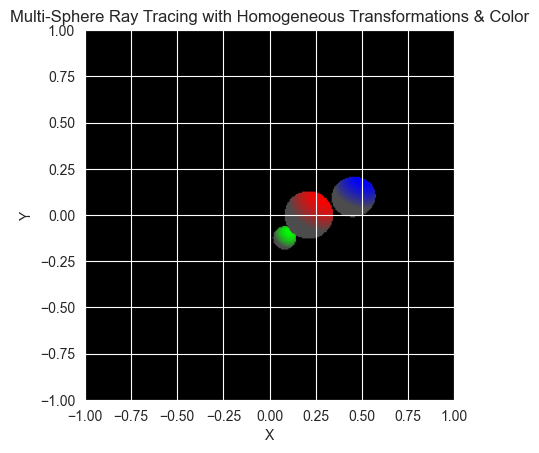

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Ray-Sphere Intersection Function
def intersect_ray_sphere(ray_origin, ray_dir, sphere_center, sphere_radius):
    """Computes intersection of a ray with a sphere using quadratic formula"""
    oc = ray_origin - sphere_center
    a = np.dot(ray_dir, ray_dir)
    b = 2.0 * np.dot(oc, ray_dir)
    c = np.dot(oc, oc) - sphere_radius**2
    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return None  # No intersection
    t = (-b - np.sqrt(discriminant)) / (2.0 * a)  # Closest intersection
    return ray_origin + t * ray_dir if t > 0 else None

# Lambertian Shading Function
def compute_lighting(point, normal, light_pos, color, reflection=0.3):
    """Computes basic Lambertian shading with reflections"""
    light_dir = light_pos - point
    light_dir /= np.linalg.norm(light_dir)
    intensity = max(np.dot(normal, light_dir), 0)  # Dot product determines brightness
    reflected_color = color * intensity + (1 - intensity) * reflection
    return np.clip(reflected_color, 0, 1)  # Ensure values stay in range

# Homogeneous Transformation Functions
def homogeneous_translation(tx, ty, tz):
    return np.array([[1, 0, 0, tx],
                     [0, 1, 0, ty],
                     [0, 0, 1, tz],
                     [0, 0, 0, 1]])

def homogeneous_scaling(sx, sy, sz):
    return np.array([[sx, 0, 0, 0],
                     [0, sy, 0, 0],
                     [0, 0, sz, 0],
                     [0, 0, 0, 1]])

def homogeneous_rotation_y(theta):
    """Homogeneous Rotation Matrix around Y-axis"""
    return np.array([[np.cos(theta), 0, np.sin(theta), 0],
                     [0, 1, 0, 0],
                     [-np.sin(theta), 0, np.cos(theta), 0],
                     [0, 0, 0, 1]])

# Image Resolution
width, height = 300, 300
aspect_ratio = width / height
fov = np.radians(90)  # Field of view
camera_origin = np.array([0, 0, -3])  # Camera positioned behind the scene

# Define Multiple Spheres with Different Transformations
spheres = [
    {"center": np.array([0, 0, 1, 1]), "radius": 0.5, "color": np.array([1, 0, 0])},  # Red Sphere
    {"center": np.array([-0.7, -0.5, 1.5, 1]), "radius": 0.3, "color": np.array([0, 1, 0])},  # Green Sphere
    {"center": np.array([0.7, 0.3, 1.2, 1]), "radius": 0.4, "color": np.array([0, 0, 1])}   # Blue Sphere
]

light_position = np.array([2, 2, -1])  # Light source position

# Apply Homogeneous Transformations
for sphere in spheres:
    # Scaling & Rotation
    transformation_matrix = (
            homogeneous_rotation_y(np.radians(30)) @  # Rotate spheres
            homogeneous_scaling(1.2, 1.2, 1.2) @      # Scale spheres
            homogeneous_translation(0.2, 0, 0)       # Translate spheres
    )
    sphere["center"] = np.dot(transformation_matrix, sphere["center"])[:3]  # Convert back to 3D

# Generate Image (RGB)
image = np.zeros((height, width, 3))

for y in range(height):
    for x in range(width):
        # Compute ray direction for each pixel
        pixel_x = (2 * (x + 0.5) / width - 1) * np.tan(fov / 2) * aspect_ratio
        pixel_y = (1 - 2 * (y + 0.5) / height) * np.tan(fov / 2)
        ray_dir = np.array([pixel_x, pixel_y, 1])
        ray_dir /= np.linalg.norm(ray_dir)  # Normalize direction

        closest_hit = None
        closest_sphere = None

        # Check for intersection with each sphere
        for sphere in spheres:
            hit_point = intersect_ray_sphere(camera_origin, ray_dir, sphere["center"], sphere["radius"])
            if hit_point is not None:
                if closest_hit is None or np.linalg.norm(hit_point - camera_origin) < np.linalg.norm(closest_hit - camera_origin):
                    closest_hit = hit_point
                    closest_sphere = sphere

        if closest_hit is not None:
            # Compute surface normal
            normal = (closest_hit - closest_sphere["center"]) / np.linalg.norm(closest_hit - closest_sphere["center"])
            # Compute lighting
            color = compute_lighting(closest_hit, normal, light_position, closest_sphere["color"])
            image[y, x] = color  # Store pixel color

# Display Image
plt.imshow(image, extent=[-1, 1, -1, 1])
plt.title("Multi-Sphere Ray Tracing with Homogeneous Transformations & Color")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Raytracing with multiple objects

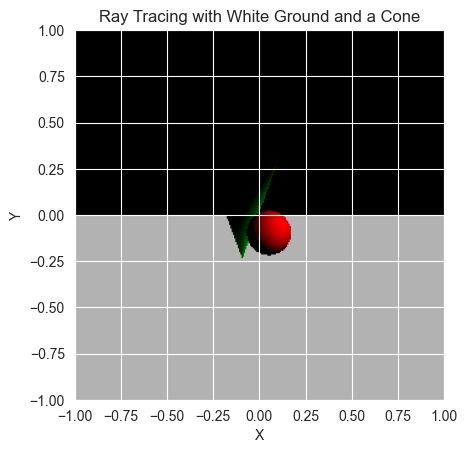

In [4]:
# Ray-Plane Intersection
def intersect_ray_plane(ray_origin, ray_dir, plane_normal, plane_point):
    """Computes intersection of a ray with a plane."""
    denom = np.dot(ray_dir, plane_normal)
    if abs(denom) < 1e-6:
        return None  # No intersection
    t = np.dot(plane_point - ray_origin, plane_normal) / denom
    return ray_origin + t * ray_dir if t > 0 else None

# Ray-Sphere Intersection
def intersect_ray_sphere(ray_origin, ray_dir, sphere_center, sphere_radius):
    """Computes intersection of a ray with a sphere."""
    oc = ray_origin - sphere_center
    a = np.dot(ray_dir, ray_dir)
    b = 2.0 * np.dot(oc, ray_dir)
    c = np.dot(oc, oc) - sphere_radius**2
    discriminant = b**2 - 4*a*c
    if discriminant < 0:
        return None
    t = (-b - np.sqrt(discriminant)) / (2.0 * a)
    return ray_origin + t * ray_dir if t > 0 else None

# Ray-Cone Intersection
def intersect_ray_cone(ray_origin, ray_dir, cone_tip, cone_axis, cone_angle):
    """Computes intersection of a ray with a cone."""
    cos_theta = np.cos(cone_angle)
    sin_theta = np.sin(cone_angle)

    co = ray_origin - cone_tip
    v = np.dot(ray_dir, cone_axis)
    w = np.dot(co, cone_axis)

    a = v**2 - cos_theta**2
    b = 2 * (v * w - np.dot(ray_dir, co) * cos_theta**2)
    c = w**2 - np.dot(co, co) * cos_theta**2

    discriminant = b**2 - 4 * a * c
    if discriminant < 0:
        return None

    t = (-b - np.sqrt(discriminant)) / (2.0 * a)
    return ray_origin + t * ray_dir if t > 0 else None

# Lambertian Shading
def compute_lighting(point, normal, light_pos, color):
    """Computes Lambertian shading"""
    light_dir = light_pos - point
    light_dir /= np.linalg.norm(light_dir)
    intensity = max(np.dot(normal, light_dir), 0)  # Dot product for brightness
    return np.clip(color * intensity, 0, 1)

# Homogeneous Transformation Matrices
def homogeneous_translation(tx, ty, tz):
    return np.array([[1, 0, 0, tx],
                     [0, 1, 0, ty],
                     [0, 0, 1, tz],
                     [0, 0, 0, 1]])

def homogeneous_scaling(sx, sy, sz):
    return np.array([[sx, 0, 0, 0],
                     [0, sy, 0, 0],
                     [0, 0, sz, 0],
                     [0, 0, 0, 1]])

# Image Resolution
width, height = 300, 300
aspect_ratio = width / height
fov = np.radians(90)  # Field of view
camera_origin = np.array([0, 1, -3])  # Camera above ground

# Scene Objects
sphere = {"center": np.array([0, 0.5, 1, 1]), "radius": 0.5, "color": np.array([1, 0, 0])}  # Red Sphere
cone = {"tip": np.array([-0.5, 0, 1, 1]), "axis": np.array([0, 1, 0]), "angle": np.radians(20), "color": np.array([0, 1, 0])}  # Green Cone
plane = {"normal": np.array([0, 1, 0]), "point": np.array([0, 0, 0]), "color": np.array([1, 1, 1])}  # White Plane (Ground)
light_position = np.array([2, 2, -1])  # Light source position

# Apply Homogeneous Transformations
transformation_matrix = homogeneous_translation(0.2, 0, 0) @ homogeneous_scaling(1.2, 1.2, 1.2)
sphere["center"] = np.dot(transformation_matrix, sphere["center"])[:3]
cone["tip"] = np.dot(transformation_matrix, cone["tip"])[:3]

# Generate Image (RGB)
image = np.zeros((height, width, 3))

for y in range(height):
    for x in range(width):
        # Compute ray direction for each pixel
        pixel_x = (2 * (x + 0.5) / width - 1) * np.tan(fov / 2) * aspect_ratio
        pixel_y = (1 - 2 * (y + 0.5) / height) * np.tan(fov / 2)
        ray_dir = np.array([pixel_x, pixel_y, 1])
        ray_dir /= np.linalg.norm(ray_dir)  # Normalize direction

        closest_hit = None
        closest_color = np.array([0, 0, 0])  # Default background color

        # Check Sphere Intersection
        hit_sphere = intersect_ray_sphere(camera_origin, ray_dir, sphere["center"], sphere["radius"])
        if hit_sphere is not None:
            normal = (hit_sphere - sphere["center"]) / np.linalg.norm(hit_sphere - sphere["center"])
            closest_hit, closest_color = hit_sphere, compute_lighting(hit_sphere, normal, light_position, sphere["color"])

        # Check Cone Intersection
        hit_cone = intersect_ray_cone(camera_origin, ray_dir, cone["tip"], cone["axis"], cone["angle"])
        if hit_cone is not None and (closest_hit is None or np.linalg.norm(hit_cone - camera_origin) < np.linalg.norm(closest_hit - camera_origin)):
            normal = (hit_cone - cone["tip"]) / np.linalg.norm(hit_cone - cone["tip"])
            closest_hit, closest_color = hit_cone, compute_lighting(hit_cone, normal, light_position, cone["color"])

        # Check Plane Intersection
        hit_plane = intersect_ray_plane(camera_origin, ray_dir, plane["normal"], plane["point"])
        if hit_plane is not None and (closest_hit is None or np.linalg.norm(hit_plane - camera_origin) < np.linalg.norm(closest_hit - camera_origin)):
            closest_hit, closest_color = hit_plane, plane["color"] * 0.7  # Slightly gray floor

        # Set pixel color
        image[y, x] = closest_color

# Display Image
plt.imshow(image, extent=[-1, 1, -1, 1])
plt.title("Ray Tracing with White Ground and a Cone")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()